In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [12]:
import matplotlib

matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (5, 5)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

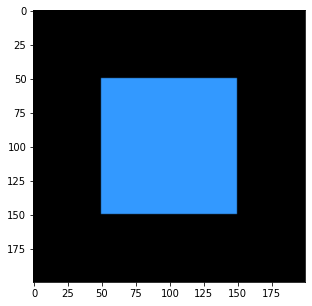

In [13]:
im = np.zeros((200, 200, 3), np.float32)

im[50:150, 50:150, 0] = 1
im[50:150, 50:150, 1] = 0.6
im[50:150, 50:150, 2] = 0.2

plt.imshow(im[:, :, ::-1])
plt.show()

Translate Image

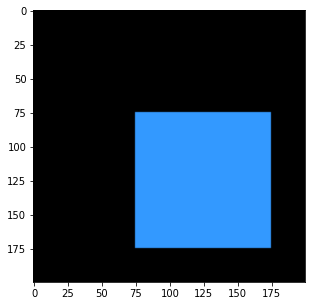

In [15]:
outDim = im.shape[0:2]

# Translate by 25,25
warpMat = np.float32(
    [
        [1.0, 0, 25],
        [0, 1.0, 25]
    ]
)

# Warp Image
result = cv.warpAffine(im, warpMat, outDim)

plt.imshow(result[..., ::-1])

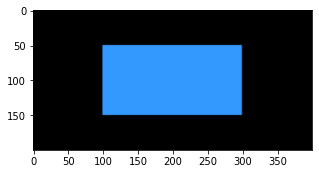

In [25]:
# Scale along x direction
warpMat = np.float32([
    [2.0, 0, 0],
    [0.0, 1.0, 0]
])

# Warp Image
# result = cv.warpAffine(im, warpMat, outDim)
result = cv.warpAffine(im, warpMat, (2 * outDim[0], outDim[1]))

# warpMat = np.float32([
#     [2.0, 0, 0],
#     [0.0, 1.0, 0]
# ])

# result = cv.warpAffine(im, warpMat, (2*outDim[0], 2*outDim[1]))
plt.imshow(result[..., ::-1])

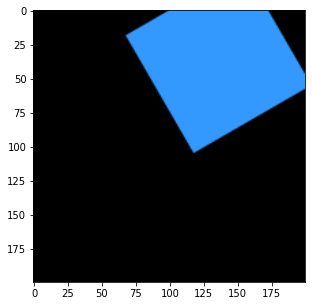

In [26]:
# Rotate the Image
angleInDegrees = 30
angleInRadians = 30 * np.pi / 180.0

cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

warpMat = np.float32([
    [cosTheta, sinTheta, 0],
    [-sinTheta, cosTheta, 0],
])

result = cv.warpAffine(im, warpMat, outDim)
plt.imshow(result[..., ::-1])

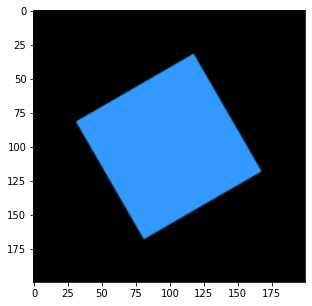

In [29]:
# Rotate image about a specific point (Center)

centerX = im.shape[0] / 2
centerY = im.shape[1] / 2

tX = (1 - cosTheta) * centerX - sinTheta * centerY
tY = sinTheta * centerX + (1 - cosTheta) * centerY

warpMat = np.float32([
    [cosTheta, sinTheta, tX],
    [-sinTheta, cosTheta, tY]
])

result = cv.warpAffine(im, warpMat, outDim)
plt.imshow(result[..., ::-1]);
plt.show()

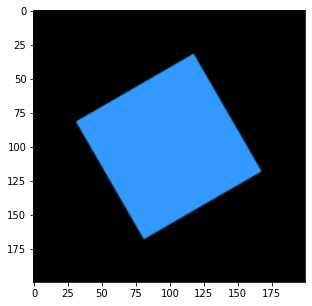

In [31]:
# Rotate Image the easy way

rotMatrix = cv.getRotationMatrix2D((centerX, centerY), angleInDegrees, 1)

result = cv.warpAffine(im, rotMatrix, outDim)
plt.imshow(result[..., ::-1]);
plt.show()

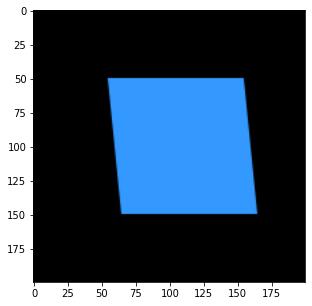

In [34]:
# Shear Transformation
shearAmount = 0.1
warpMat = np.float32([
    [1, shearAmount, 0],
    [0, 1.0, 0]
])
result = cv.warpAffine(im, warpMat, outDim, None, flags=cv.INTER_LINEAR)
plt.imshow(result[..., ::-1]);
plt.show()

[[ 1.0832886   0.08268414 10.        ]
 [-0.191013    1.1023899   0.        ]]
[[ 68.29864   76.48437  175.54419  183.72992 ]
 [ 45.568848 154.70544   26.658562 135.79517 ]]


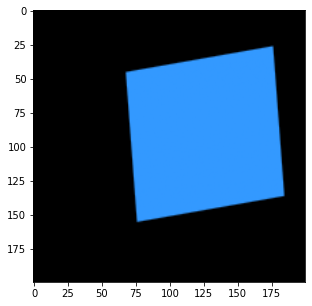

In [54]:
# Complex Transformation
# Rotate, Shear, Scale and Translate

#Scale
scaleAmount = 1.1
scaleMat = np.float32(
    [
        [scaleAmount, 0.0],
        [0.0, scaleAmount]
    ]
)

#Shear
shearAmount = -0.1
shearMat = np.float32(
    [
        [1, shearAmount],
        [0, 1.0]
    ]
)

#Rotate by 10 degrees
angleInRadians = 10 * np.pi / 180.0
cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

rotateMat = np.float32([
    [cosTheta, sinTheta],
    [-sinTheta, cosTheta]
])

translateMat = np.float32([
    [10],
    [0]
])

scaleShearRotate = rotateMat @ shearMat @ scaleMat
warpMat = np.append(scaleShearRotate, translateMat, 1)
print(warpMat)
outPts = scaleShearRotate @ np.float32([
    [50, 50],
    [50, 149],
    [149, 50],
    [149, 149]
]).T + translateMat
print(outPts)

# Warp Image
result = cv.warpAffine(im, warpMat, outDim)
plt.imshow(result[..., ::-1])
plt.show()

True warp matrix:

 [[ 1.0832886   0.08268414 10.        ]
 [-0.191013    1.1023899   0.        ]]


Estimated warp matrix:

 [[ 1.09090909  0.08080808  9.41414141]
 [-0.18181818  1.11111111 -1.46464646]]


True warp matrix:

 [[ 1.0832886   0.08268414 10.        ]
 [-0.191013    1.1023899   0.        ]]


Estimated warp matrix:

 [[ 1.08585859  0.07575758 10.16919192]
 [-0.19191919  1.1010101   0.04545455]]


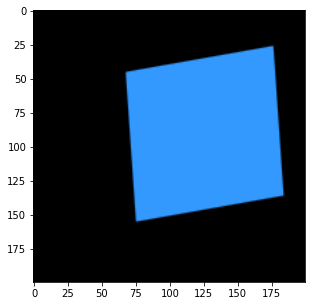

In [58]:
# Complex Transformations Using 3-Point Correspondences

srcPoints = np.float32([[50, 50], [50, 149], [149, 50]])
dstPoints = np.float32([[68, 45], [76, 155], [176, 27]])
estimatedMat = cv.estimateAffine2D(srcPoints, dstPoints)[0]
print("True warp matrix:\n\n", warpMat)
print("\n\nEstimated warp matrix:\n\n", estimatedMat)

# When use all 4 points
srcPoints = np.float32([[50, 50], [50, 149], [149, 149], [149, 50]])
dstPoints = np.float32([[68, 45], [76, 155], [183, 135], [176, 27]])
estimatedMat = cv.estimateAffine2D(srcPoints, dstPoints)[0]
print("\n\nTrue warp matrix:\n\n", warpMat)
print("\n\nEstimated warp matrix:\n\n", estimatedMat)

result = cv.warpAffine(im,estimatedMat,outDim)
plt.imshow(result[...,::-1])

Text(0.5, 1.0, 'Transformed Image')

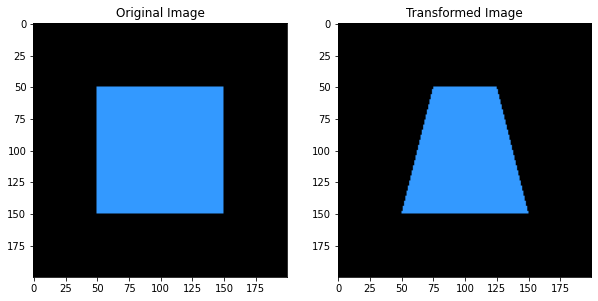

In [59]:
# Limitation of Affine Transformation
# Transformed image
imT = np.zeros((200, 200, 3), dtype = np.float32)
dstPoints = np.float32([[75, 50],[50, 149], [149, 149], [124, 50]])
cv.fillConvexPoly(imT, np.int32(dstPoints), (1.0, 0.6, 0.2), cv.LINE_AA)

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.title('Original Image')

plt.subplot(122)
plt.imshow(imT[:,:,::-1])
plt.title('Transformed Image')



Estimated warp matrix:

 [[ 0.49494949 -0.25252525 62.87878788]
 [ 0.          1.          0.        ]]


Text(0.5, 1.0, 'Image warped using estimated Affine Transform')

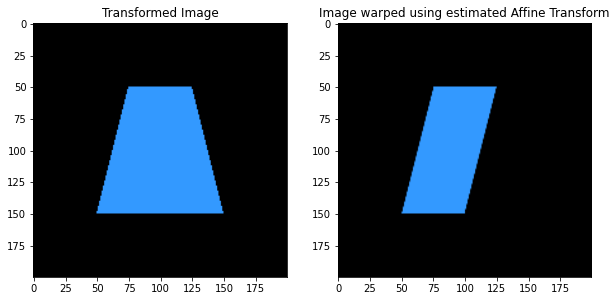

In [60]:
estimatedMat = cv.estimateAffine2D(srcPoints, dstPoints)[0]
print("\n\nEstimated warp matrix:\n\n", estimatedMat)

# Warp image
imA = cv.warpAffine(im, estimatedMat, outDim)

# Display image
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(imT[:,:,::-1])
plt.title('Transformed Image')

plt.subplot(122)
plt.imshow(imA[:,:,::-1])
plt.title('Image warped using estimated Affine Transform')

[[ 3.94358182e-01 -4.04438664e-01  6.02613609e+01]
 [ 6.03047798e-16  1.91122673e-01  3.02820909e+01]
 [ 6.45880061e-18 -4.06471019e-03  1.00000000e+00]]


Text(0.5, 1.0, 'Image warped using estimated Homography')

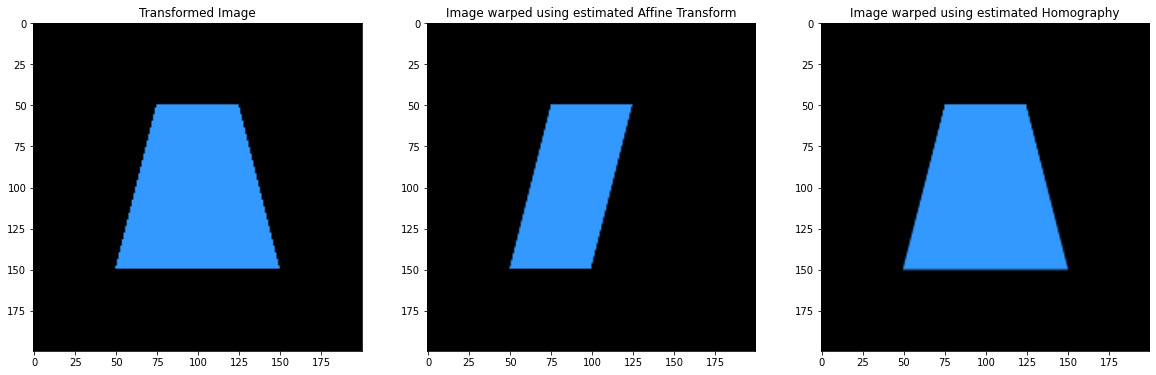

In [62]:
# Using homography to solve the issue
h, status = cv.findHomography(srcPoints,dstPoints)
print(h)
imH = cv.warpPerspective(im,h,outDim)

# Display image
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(imT[:,:,::-1])
plt.title('Transformed Image')

plt.subplot(132)
plt.imshow(imA[:,:,::-1])
plt.title('Image warped using estimated Affine Transform')

plt.subplot(133)
plt.imshow(imH[:,:,::-1])
plt.title('Image warped using estimated Homography')